In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'cirrus-cumulus-stratus-nimbus-ccsn-database:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1411651%2F2338260%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240703%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240703T222846Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2ce2b0d51fd5cbfea3fbe77ddbf9c47857ca0af286d47a75af355f5c663bd9dd265ac79a7025301ae69598c9d9bed11185a30f46de34b763f125169ac65620d77c06ecf70c16b36305d830b8f6a04fbc519d941ca79df5c27f0cd770f2a46453bd4f9e545742ba2c438bbf596416bbb69ae3cd25ed9f3286355bf43d61f2cadc21f5732516a56c122efa8a3aa03c9652045cf01bdf945c54bee8a88ab661139e6f7fa5dfcea522ec260d4b4c076f9bc1c9abfd7c07788fe0a335e29fd7192c005b1222a0c299587199b10f8e74803a92914406efbc8cdc1674bca7b83585229e0d0a9081ff3e94ed6ab1a31190300ed2b40354ff086fe4c04b77720be6701817'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 97687988 bytes downloaded
Downloaded and uncompressed: cirrus-cumulus-stratus-nimbus-ccsn-database
Data source import complete.


In [4]:
import os

iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if not iskaggle:
    !pip install -Uqq fastai duckduckgo_search



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 31.1 MB/s eta 0:00:00


In [5]:
#!pip install -Uqq fastbook
#import fastbook
#fastbook.setup_book()
#from fastbook import *

from duckduckgo_search import DDGS
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
from fastai.vision.widgets import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Context:

Cloud classification plays a crucial role in meteorology, providing valuable information for weather prediction, climate research, and environmental monitoring. Traditionally, cloud classification has relied on satellite imagery and human observation, both of which have limitations. Ground-based cloud classification using machine learning offers a promising alternative by leveraging advancements in computer vision to analyze cloud patterns from the ground, providing real-time and localized data. This project aims to develop an automated system for classifying cloud types using ground-based images, contributing to more accurate and efficient weather forecasting and climate studies.

<img alt="Cloud patterns from the ground" width="1000" caption="Cloud patterns from the ground" src="https://cdn.pixabay.com/photo/2018/01/23/23/34/nature-3102762_1280.jpg"/>

## Objective
The objective of this project is to develop a robust machine learning model capable of accurately classifying ground-based cloud images into various cloud types. By utilizing convolutional neural networks (CNNs) and transfer learning, the project aims to leverage pre-existing knowledge from pre-trained models and new data augmentation techniques to enhance the classification accuracy. The ultimate goal is to deploy this model in real-world applications, enabling meteorologists and researchers to access real-time cloud classification data, thereby improving weather forecasting, climate monitoring, and environmental assessments.

## Step 1: Creating a simple model:

To get familiar with fastai API, I will first create a simple model that distinguishes three main types of clouds by following these steps:

1. Use DuckDuckGo to search for images of cirrus, stratus, and cumulus cloud photos.
2. Fine-tune a pretrained neural network to recognise these four groups.
3. Try running this model on a random cloud image and see if it works.

### Step 1.1: Gathering data

In [6]:
def search_image(term, max_images=30):
    print(f"Searching for '{term}' photos")
    with DDGS() as ddgs:
        results = ddgs.images(term, max_results=max_images)
    return L(results).itemgot('image')

We will start by checking a sample of the results we got:

Searching for 'cirrus cloud photos' photos
Searching for 'stratus cloud photos' photos
Searching for 'cumulus cloud photos' photos


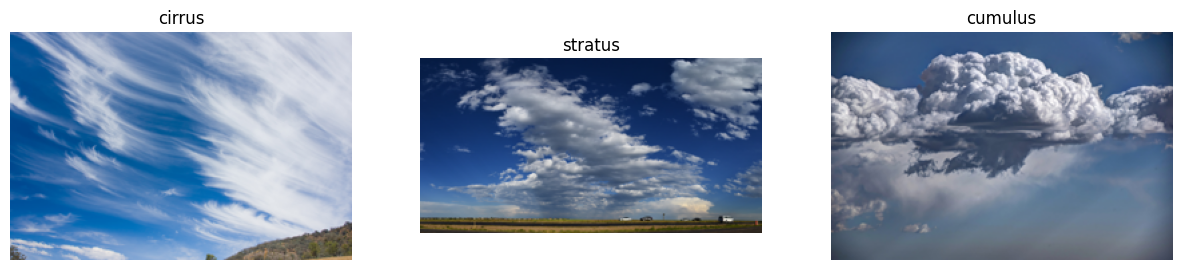

In [7]:
cloud_types = ["cirrus", "stratus", "cumulus"]
images = []

#Download image for each type
for i in cloud_types:
    url = search_image(f"{i} cloud photos")[0]
    dest = f"{i}.jpg"
    download_url(url, dest, show_progress=False)
    im = Image.open(dest).to_thumb(256, 256)
    images.append(im)

#Display images in a row
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, img, title in zip(axes, images, cloud_types):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

plt.show()

Our searches are giving reasonable results, so lets gather more photos of each type and save each group in a different folder.

In [8]:
path = Path("cloud_classify")

for i in cloud_types:
    dest = (path/i)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_image(f"{i} cloud photos"))
    resize_images(path/i, max_size=400, dest=path/i)



Searching for 'cirrus cloud photos' photos
Searching for 'stratus cloud photos' photos
Searching for 'cumulus cloud photos' photos


### Step 1.2: Training the model

Some photos might not download correctly which could cause our model training to fail, so we'll remove them:

In [9]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

1

In [10]:
#Dataloaders containing training set and validation set
clouds = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)
dls = clouds.dataloaders(path, bs=32)


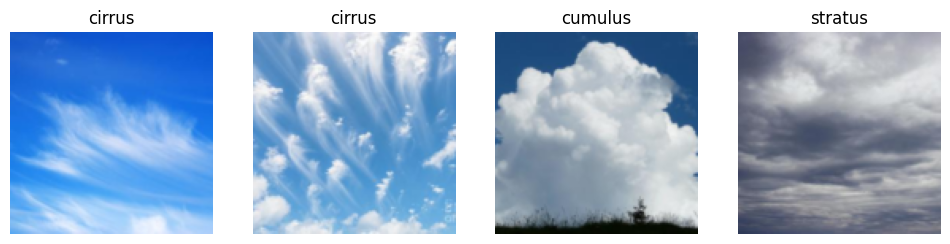

In [11]:
dls.valid.show_batch(max_n=4, nrows=1)

In [13]:
learner = vision_learner(dls, resnet34, metrics=error_rate)
learner.fine_tune(6)

This current simple model gives an error rate of about 24%, which is quite good already considering the dataset created from a random image search online. With more data, the error rate should improve. Another possible factor that contributes to the errors is that the default resize method can crop off some important details. Therefore, we will modify the model to have randomized cropping. On each epoch, our model will then focus on a random part of the image and learn to recognize different features in our images.

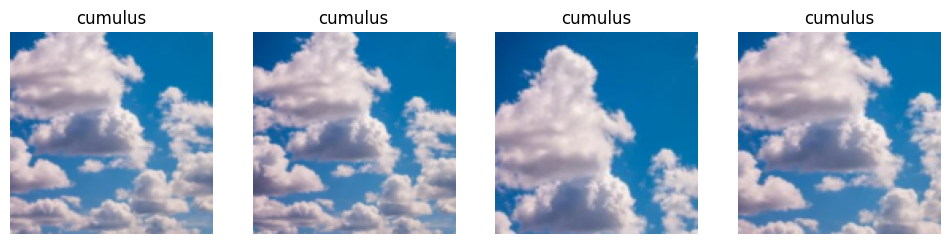

In [ ]:
clouds = clouds.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = clouds.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [ ]:
learner = vision_learner(dls, resnet34, metrics=error_rate)
learner.fine_tune(6)

It appears that random cropping did not do much to improve the error rate. We will now also try apply data augmentation techniques, including rotation, flipping, brightness changes, contrast changes, and perspective warping.

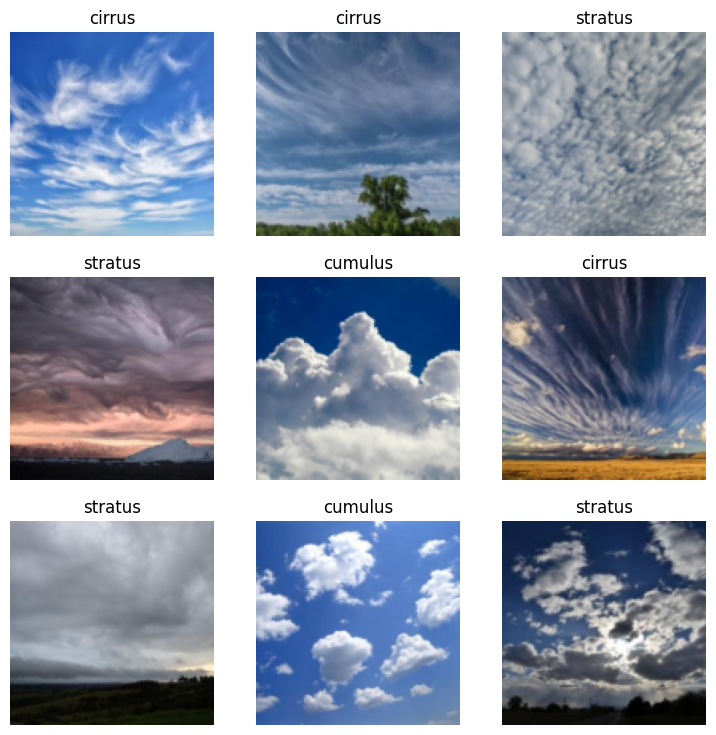

In [ ]:
clouds = clouds.new(item_tfms=Resize(128), batch_tfms=aug_transforms)
dls = clouds.dataloaders(path)
dls.show_batch()

In [ ]:
learner = vision_learner(dls, resnet34, metrics=error_rate)
learner.fine_tune(6)

It appears that data augmentations introduced unnecessary complications that increased the error rate of the model. Hence, for this dataset, the first model with only resizing would fit best.

### Step 1.3: Cleaning the data

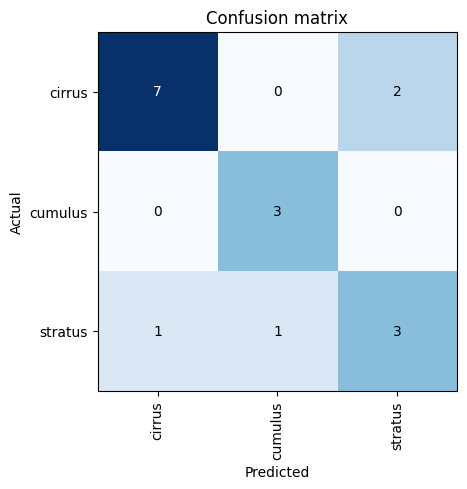

In [14]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

From the confusion matrix, it appears that the model struggles with misidentifying stratus clouds and cirrus clouds. Let's list the images that give the highest loss and diagnose the issue:

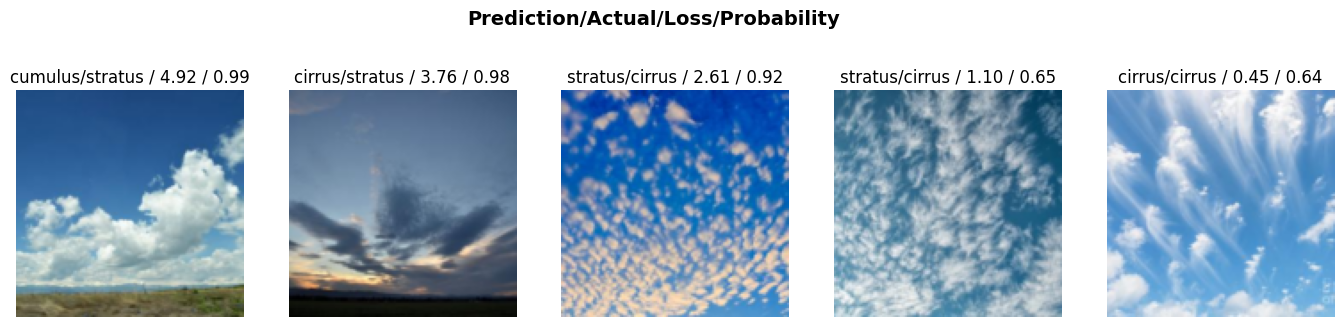

In [15]:
interp.plot_top_losses(5, nrows=1, figsize=(17,4))

In [16]:
cleaner = ImageClassifierCleaner(learner)
cleaner

In [17]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx, cat in cleaner.change():shutil.move(str(cleaner.fns[idx]), path/cat)

In [21]:
#Dataloaders containing training set and validation set
clouds = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)
dls = clouds.dataloaders(path, bs=32)

learner = vision_learner(dls, resnet34, metrics=error_rate)
learner.fine_tune(6)

After cleaning the data, the error rate was lowered to 6%, which is great considering the quality of the dataset. Further improvements would involve training on a larger dataset that allows the model to learn more deeply about the features of each type. Here we want to export this model and turn it into a web application for people to use.

### Step 1.4: Creating an online web application

In [64]:
learner.export()

In [65]:
path = Path()
path.ls(file_exts=".pkl")

(#1) [Path('export.pkl')]

We will build our simple image classifier GUI step by step with ipywidgets. First, we will need an upload button.

In [26]:
#hide output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [53]:
#hide
#This allows me to upload an image locally on google colab.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
#hide
#Since we can't upload on notebook, we will fake the upload as an example
btn_upload = SimpleNamespace(data = ["/content/drive/My Drive/collab_working/cirrus_cloud.jpeg"])

In [51]:
img = PILImage.create(btn_upload.data[-1])

We can use an output widget to display the image:

In [52]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

Now we can call the model and make predictions on it:

In [54]:
pred,pred_idx,probs = learner_inf.predict(img)

Here we use the Label widget to display the result:

In [55]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: cirrus; Probability: 0.9997')

We need a button to do the classification:

In [56]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

We'll also need a *click event* handler; that is, a function that will be called when it's pressed.

In [60]:
def on_click_classify(change):
    if btn_upload.data:  # Check if any files have been uploaded
        img = PILImage.create(btn_upload.data[-1])
        out_pl.clear_output()
        with out_pl: display(img.to_thumb(128,128))
        pred,pred_idx,probs = learn_inf.predict(img)
        lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
    else:
        lbl_pred.value = 'Please upload an image first.'  # Inform the user if no image is uploaded

btn_run.on_click(on_click_classify)

We can now put them all in a vertical box (VBox) to complete our GUI:

In [61]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()


In [63]:
#hide_output
VBox([widgets.Label('Select your cloud!'),
      btn_upload, btn_run, out_pl, lbl_pred])

## Step 2: Creating a more sophisoticated model with real data

In [ ]:
#Installs relative path over hard-coded path for EXE file to work
def resource_path(relative_path):
    """ Get absolute path to resource, works for PyInstaller """
    try:
        # PyInstaller creates a temp folder and stores path in _MEIPASS
        base_path = sys._MEIPASS
    except Exception:
        base_path = os.path.abspath(".")
    return os.path.join(base_path, relative_path)

#For external datasets
#path= resource_path(r'cloud_data')


In [ ]:
#In this case, the cloud dataset is already in the Kaggle database
path = Path("/kaggle/input/cirrus-cumulus-stratus-nimbus-ccsn-database/CCSN_v2")
path.ls()

Let's first gather all the image files from the folders of the dataset:

In [ ]:
clouds = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

In [ ]:
dls = clouds.dataloaders(path)

In [ ]:
dls.show_batch()

We will follow a similar process as the simple model. We will first train the model to help us identify its weaknesses and then attempt to address them by cleaning and transforming the data.

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)


Since this is a more advanced model classifying 11 different types of clouds, we will try to find the best learning rate.

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(25, 1.4454e-3)

We used a pretrained model resnet34 and fine tuned it to specifically identify cloud types. However, the current error rate is about 52%, which is quite inaccurate. I suspect that the model is having a lot of trouble with some ambiguous images where the clouds would exhibit characteristics from multiple types. Hence, cleaning the data should lower the error rate.

In [ ]:
learn.show_results()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
clouds = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)
dls = clouds.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(25, 1.4454e-3)